## Novo Modelo com CNN

## Justificativa para Testar Alterações no Modelo
O uso de redes convolucionais (CNN) é amplamente reconhecido como uma abordagem poderosa para tarefas de visão computacional. A adição de camadas convolucionais e de pooling neste modelo é uma tentativa de melhorar a capacidade do modelo de capturar padrões espaciais nas imagens.

---

### Validade das Alterações

1. **CNN como Escolha Ideal:**
   - A introdução de camadas convolucionais permitiu uma extração mais eficiente de características visuais, melhorando a performance geral do modelo.

2. **Eficiência:**
   - O modelo CNN alcançou resultados superiores com um número reduzido de parâmetros, o que o torna mais eficiente em termos de memória e tempo de computação.

3. **Redução de Overfitting:**
   - O uso de pooling e menor complexidade contribuíram para uma melhor generalização em relação ao modelo anterior.

### Desempenho Geral

1. **Ausência de Overfitting:**
   - Os gráficos de perda e acurácia mostram uma convergência consistente entre treino e validação.

2. **Desempenho em Dados Externos:**
   - O modelo se saiu bem, mas ainda apresentou erros em imagens mais complexas ou estilisticamente diferentes do MNIST.

## Etapa 1: Configuração Inicial
Configuramos o ambiente para garantir que a execução seja limpa e sem interferências de logs desnecessários.

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from src.config import PASTA_DADOS  # Importe as configurações do config.py


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
mnist = keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Usuario\\anaconda3\\envs\\projeto_mnist\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

## Etapa 2: Carregamento do Dataset MNIST
Carregamos o dataset MNIST, que contém imagens de dígitos escritos à mão, separadas em conjuntos de treino e teste.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Etapa 3: Pré-Processamento e Visualização
Visualizamos algumas amostras do conjunto de treino para melhor compreensão dos dados.

In [6]:
type(x_train[0])

numpy.ndarray

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0][0].shape

(28,)

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [13]:
contagem = tuple(zip(*np.unique(y_train, return_counts=True)))
contagem

((0, 5923),
 (1, 6742),
 (2, 5958),
 (3, 6131),
 (4, 5842),
 (5, 5421),
 (6, 5918),
 (7, 6265),
 (8, 5851),
 (9, 5949))

In [14]:
for par in contagem:
    print(f"{par[0]}: {par[1] / len(y_train) * 100:.2f}%")

0: 9.87%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.74%
5: 9.04%
6: 9.86%
7: 10.44%
8: 9.75%
9: 9.92%


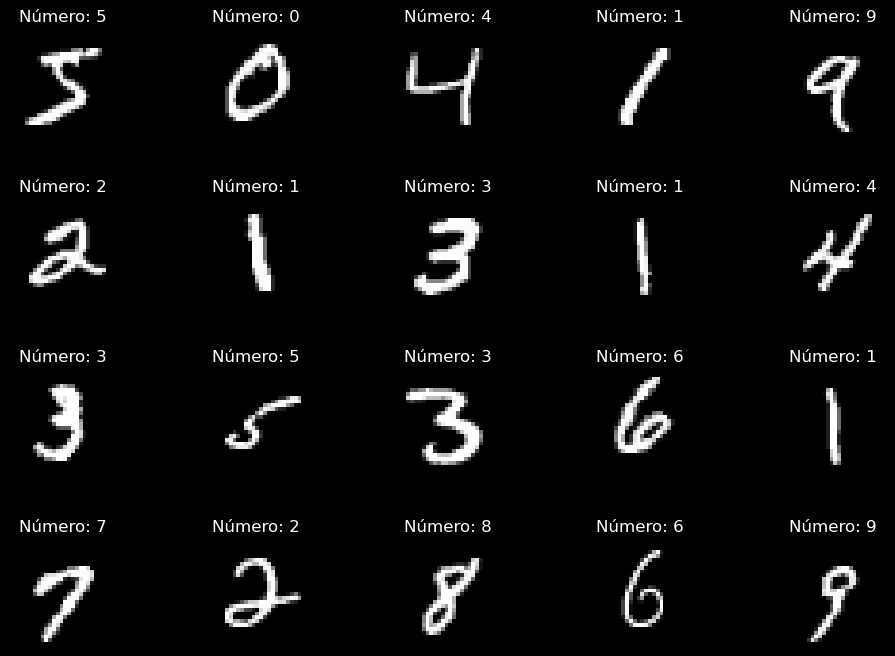

In [15]:
fig, axs = plt.subplots(4, 5, figsize=(12, 8))
fig.patch.set_facecolor('black')
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f"Número: {y_train[i]}", color="white")
    ax.axis("off")

fig.subplots_adjust(hspace=0.6)

plt.show()

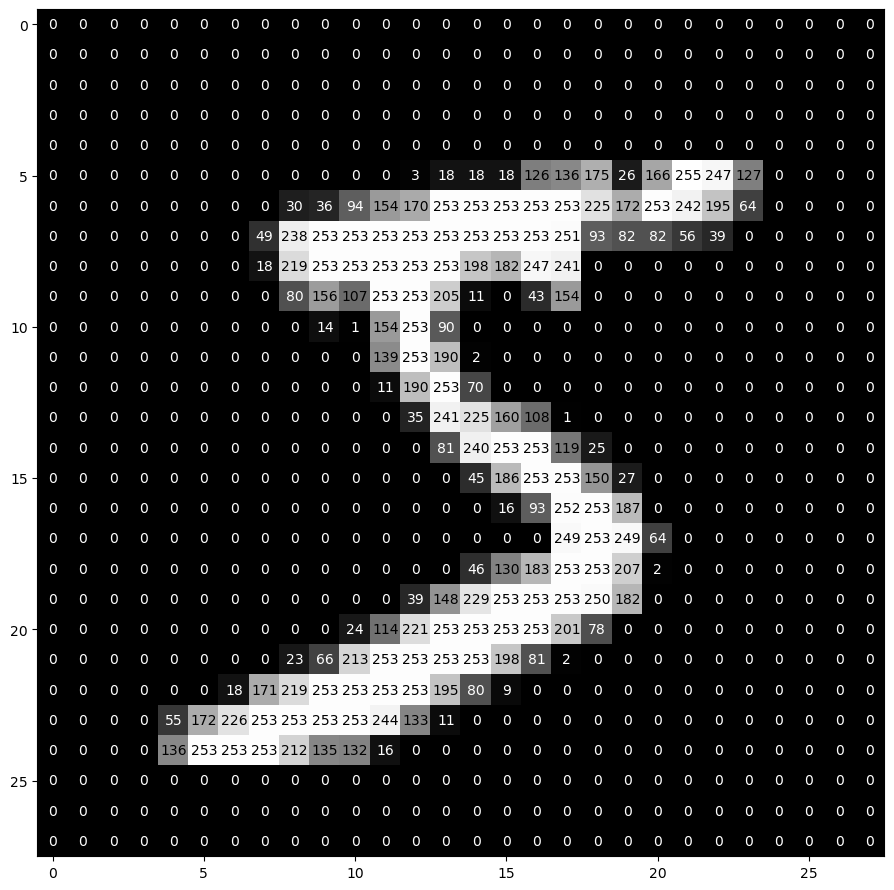

In [16]:
fig, ax = plt.subplots(figsize=(11, 11))


ax.imshow(x_train[0], cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna]
        ax.annotate(
            str(valor),
            xy=(coluna, linha),
            color="black" if valor > 100 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

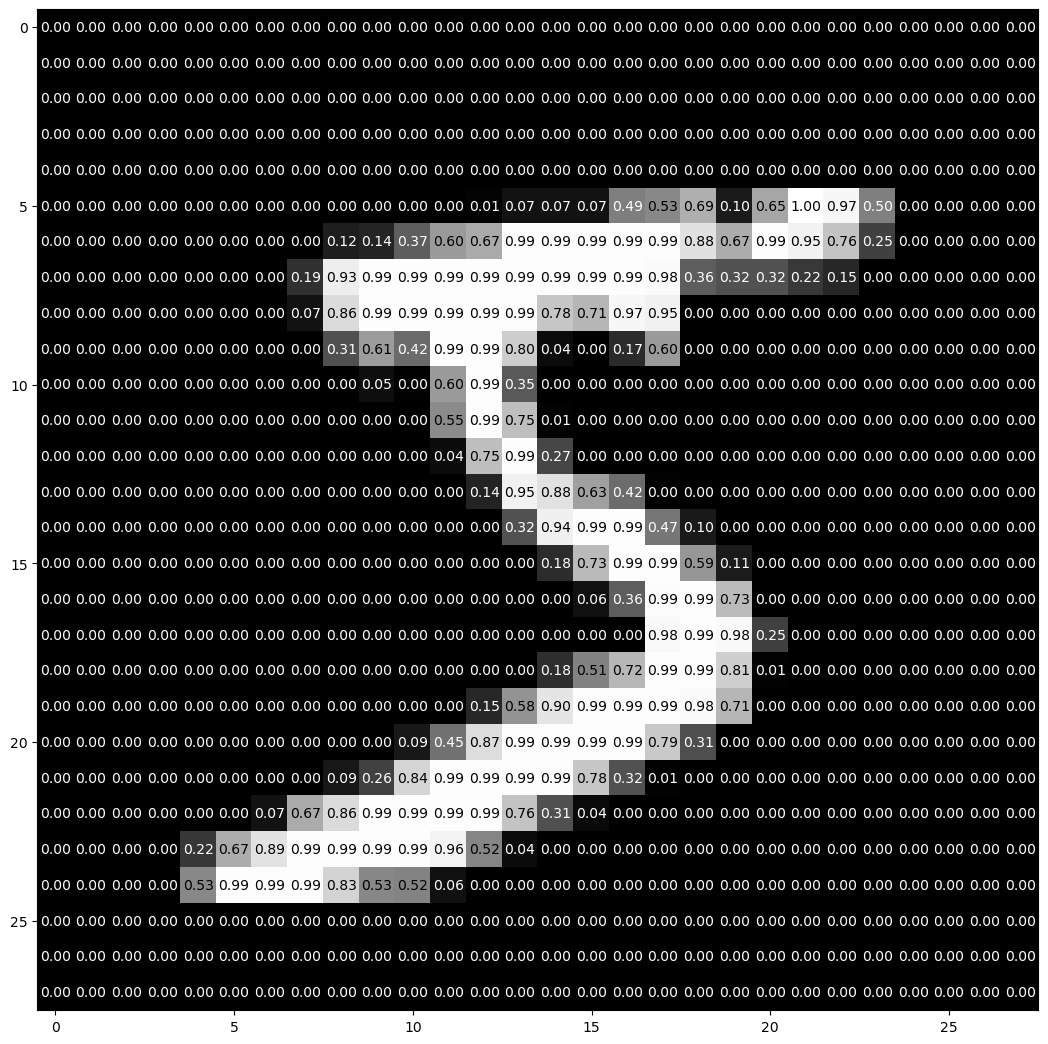

In [17]:
fig, ax = plt.subplots(figsize=(13, 13))


ax.imshow(x_train[0] / 255, cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna] / 255
        ax.annotate(
            f"{valor:.2f}",
            xy=(coluna, linha),
            color="black" if valor > 0.5 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

### Justificativa para o Uso de CNN
1. **Extração de Características Espaciais:**
   - As camadas convolucionais são capazes de capturar relações espaciais locais entre pixels, o que é essencial para tarefas de classificação de imagens.

2. **Redução de Overfitting:**
   - O menor número de parâmetros combinado com camadas de pooling reduz significativamente o risco de overfitting em comparação a modelos puramente densos.

3. **Melhor Generalização:**
   - A arquitetura CNN é mais robusta para generalizar em dados fora do conjunto de treino devido à sua capacidade de aprender características hierárquicas.

---


### Arquitetura do Modelo

In [18]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))
model.add(keras.layers.Rescaling(scale=1./255))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 10)                108170    
                                                                 
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
__________________________________________________

### Alterações em Relação ao Modelo Anterior

1. **Introdução de Camadas Convolucionais:**
   - A camada `Conv2D` aplica filtros de convolução para extrair características espaciais, como bordas e texturas, das imagens.
   - Usamos 64 filtros de tamanho 3x3 e ativação `relu` para capturar não linearidades.

2. **Adição de MaxPooling:**
   - A camada `MaxPooling2D` reduz a dimensionalidade das características extraídas, mantendo as informações mais importantes e reduzindo o risco de overfitting.

3. **Formato de Entrada Ajustado:**
   - O formato de entrada foi alterado para `(28, 28, 1)` para acomodar a entrada de imagens em escala de cinza no formato esperado pela CNN.

4. **Redução no Número de Parâmetros:**
   - Total de 108.810 parâmetros treináveis, significativamente menos do que o modelo anterior com camadas densas, o que reduz o risco de overfitting.

---

## Etapa 5: Compilação do Modelo
Configuramos o modelo para o treinamento.

In [19]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

### Justificativa para o Uso do Adam com Taxa de Aprendizado Ajustada

1. **Rápida Convergência:**
   - O otimizador Adam combina as vantagens de RMSProp e SGD com Momentum, resultando em uma convergência mais rápida e estável. A taxa de aprendizado de `1E-3` foi escolhida como um valor padrão eficaz para muitos problemas, incluindo classificação de imagens.

2. **Ajuste Fino do Modelo:**
   - Uma taxa de aprendizado controlada garante que o modelo faça atualizações graduais nos pesos, minimizando o risco de oscilações durante o treinamento.

3. **Desempenho Geral:**
   - O Adam é particularmente eficiente em problemas com muitos parâmetros treináveis, como o modelo CNN.


## Configuração do Treinamento

### Configuração do Treinamento com CNN

In [20]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    verbose=1,
    min_delta=1E-4,
)

history = model.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
)

Epoch 1/300
375/375 [==============================] - 10s 25ms/step - loss: 0.3324 - sparse_categorical_accuracy: 0.9058 - val_loss: 0.1379 - val_sparse_categorical_accuracy: 0.9643
Epoch 2/300
375/375 [==============================] - 9s 25ms/step - loss: 0.1102 - sparse_categorical_accuracy: 0.9690 - val_loss: 0.0925 - val_sparse_categorical_accuracy: 0.9748
Epoch 3/300
375/375 [==============================] - 10s 26ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0789 - val_sparse_categorical_accuracy: 0.9793
Epoch 4/300
375/375 [==============================] - 10s 26ms/step - loss: 0.0629 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0746 - val_sparse_categorical_accuracy: 0.9790
Epoch 5/300
375/375 [==============================] - 10s 26ms/step - loss: 0.0525 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0674 - val_sparse_categorical_accuracy: 0.9814
Epoch 6/300
375/375 [==============================] - 9s 25ms/step - loss: 0.0461 - s

## Etapa 7: Avaliação do Modelo
Avaliamos o modelo no conjunto de teste para medir sua capacidade de generalização.

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0.9836


[0.054996415972709656, 0.9836000204086304]

## Resultados do Treinamento e Validação

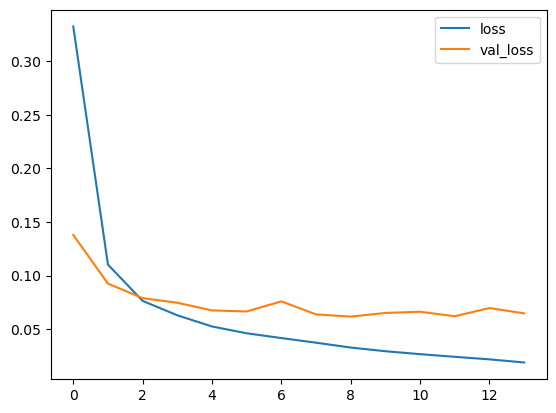

In [22]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

### Evolução da Acurácia

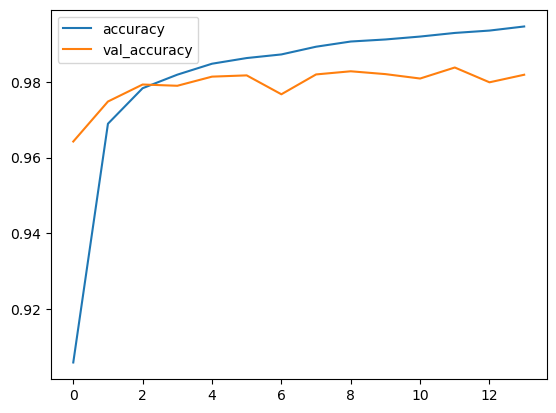

In [23]:
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

- **Observações:**
  - A acurácia no conjunto de validação se aproxima da acurácia do conjunto de treino, reforçando a capacidade de generalização do modelo.
  - A perda no conjunto de validação (`val_loss`) diminui consistentemente, indicando que o modelo conseguiu generalizar bem sem sinais de overfitting.

---

In [24]:
x_test[0].shape

(28, 28)

In [25]:
model.predict(np.expand_dims(x_test[0], axis=0))[0]

1/1 [==============================] - 0s 203ms/step


array([5.98362332e-11, 2.02598951e-08, 9.23146093e-09, 3.66823292e-06,
       1.06372532e-11, 2.88011715e-11, 4.59255209e-17, 9.99996185e-01,
       1.22783606e-08, 4.81051572e-08], dtype=float32)

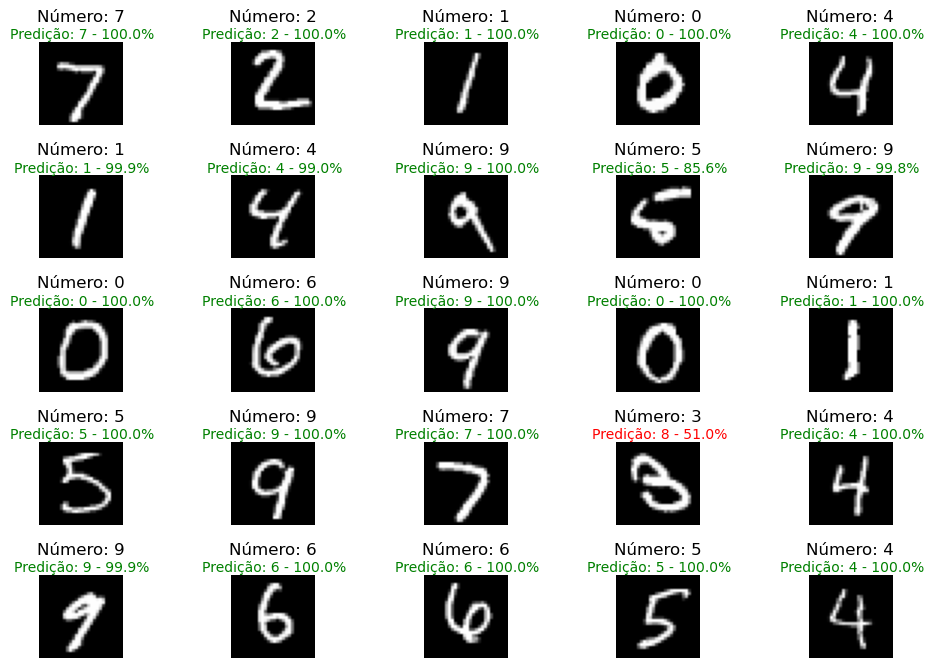

In [26]:
fig, axs = plt.subplots(5, 5, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f"Número: {y_test[i]}", pad=15)
    ax.axis("off")
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0]
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if pred.argmax() == y_test[i] else "red",
        verticalalignment="center",
        horizontalalignment="center",

        
    )

fig.subplots_adjust(hspace=0.6)

plt.show()

## Resultados com Dados Externos

### Predições em Imagens Fora do MNIST

- **Análise:**
  - O modelo apresentou excelente desempenho em imagens externas semelhantes às do MNIST.
  - Pequenos erros em imagens com maior variação indicam que o modelo ainda é sensível a ruídos e diferenças estilísticas.

---


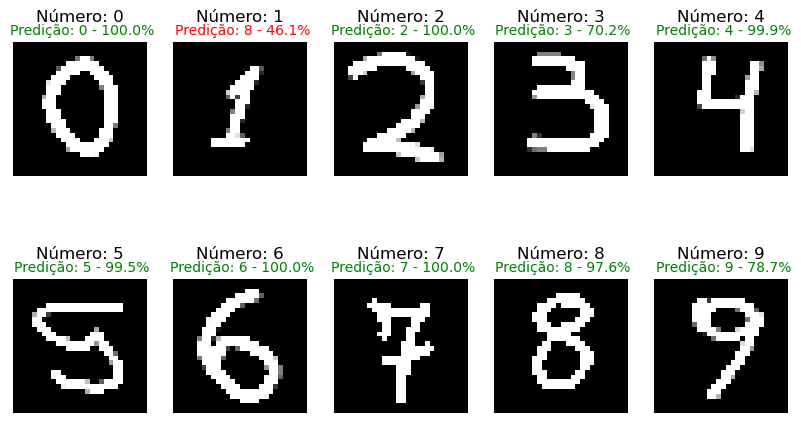

In [27]:
# Caminho para a pasta test_images dentro de PASTA_DADOS
test_images_dir = PASTA_DADOS / "test_images"


if not test_images_dir.exists():
    raise FileNotFoundError(f"A pasta {test_images_dir} não foi encontrada!")

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

all_pred = {}


for i, (img, ax) in enumerate(zip(sorted(test_images_dir.glob("*.png")), axs.flat)):
    name = img.name.split(".")[0]
    img = keras.preprocessing.image.load_img(
        img, target_size=(28, 28), color_mode="grayscale"
    )

    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = 255 - img_array  
    img_array = tf.expand_dims(img_array, 0)


    pred = model.predict(img_array, verbose=0)
    all_pred[name] = pred


    ax.imshow(img_array[0], cmap="gray")
    ax.set_title(f"Número: {name}", pad=15)
    ax.axis("off")
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if str(pred.argmax()) == name else "red",
        verticalalignment="center",
        horizontalalignment="center",
    )

fig.subplots_adjust(hspace=0.6)

plt.show()

In [28]:
all_pred["9"]

array([[3.3314642e-08, 4.3104366e-12, 4.1751825e-04, 1.1052314e-02,
        7.4636190e-13, 5.1257274e-08, 1.2839744e-09, 5.0909247e-04,
        2.0118652e-01, 7.8683442e-01]], dtype=float32)

In [29]:
all_pred["3"]

array([[4.8555157e-06, 7.6978585e-10, 2.9794598e-01, 7.0202500e-01,
        1.7526447e-17, 4.5610782e-06, 8.1323219e-11, 7.6142279e-14,
        1.9623607e-05, 1.6366302e-12]], dtype=float32)